<a href="https://colab.research.google.com/github/kapetanioyy/datastories_for_emme/blob/main/%CE%91%CE%BD%CF%84%CE%AF%CE%B3%CF%81%CE%B1%CF%86%CE%BF_Homework_Lesson10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Για να φτιάξουμε wordclouds από κείμενα άρθρων χρειαζόμαστε τις παρακάτω βιβλιοθήκες, τις οποίες εισάγουμε όλες μαζί στην αρχή.

Εάν έχουμε ελληνικά κείμενα:
- βγάζουμε το # από την αρχή της παρακάτω εντολής (κάνουμε δλδ uncomment) και τρέχουμε το κελί
- όταν τελειώσει:
1. ξαναβάζουμε το # (κάνουμε comment)
2. Runtime -> Restart session and run all (ανανεώνουμε το session για να ξέρει ότι τώρα έχουμε και το λεξικό της βιβλιοθήκης spacy)

In [1]:
#!python -m spacy download el_core_news_sm

### ΕΙΣΑΓΩΓΗ ΒΙΒΛΙΟΘΗΚΩΝ

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# εάν έχουμε αγγλικά κείμενα
from wordcloud import WordCloud, STOPWORDS

# εάν έχουμε ελληνικά κείμενα
import spacy

In [3]:
# φτιάχνω κατευθείαν και το nlp για να το έχω έτοιμο για τα wordclouds μου και όποια ανάλυση κειμένου θέλω να κάνω
nlp = spacy.load('el_core_news_sm')

### ΔΗΜΙΟΥΡΓΙΑ DATAFRAME

Αρχικά, φέρνουμε τα δεδομένα μας (αρχεία xlsx ή csv) και τα ανεβάζουμε στο drive μας.

Στη συνέχεια, εισάγουμε τα δεδομένα μας στην python (φτιάχνουμε dataframes).

Στην αριστερή μπάρα στο colab:
- πατάτε το εικονίδιο του φακέλου (τελευταίο εικονίδιο)
- πατάτε το εικονίδιο του φακέλου με το σήμα του google drive και συνδέεστε στο drive σας
- AN TO KANETE ΓΙΑ ΠΡΩΤΗ ΦΟΡΑ στον υπολογιστή σας, θα σας πει να τρέξετε ένα κελί που δημιουργεί για να συνδεθείτε στο drive σας - Μόλις το τρέξετε θα σας ανοίξει ένα παράθυρο για να αποδεχθείτε τη σύνδεση
- πατάτε το φάκελο του drive και του MyDrive
- ΑΝ ΔΕΝ ΥΠΑΡΧΕΙ ο φάκελος του Drive, κάνετε Refresh το tab στον browser και θα εμφανιστεί
- πατάτε στο φάκελο που έχετε ανεβάσει το xlsx της efsyn
- εντοπίζετε το xslx, βάζετε πάνω του το πονίκι και πατάτε στις 3 τελίτσες που εμφανίζονται δεξιά του ονόματος του αρχείου
- πατάτε copy path στο μενού που εμφανίζεται

Σε ένα νέο κελί γράφετε:

```
df = pd.read_excel(<κάνετε paste το path που κάνατε copy στο τελευταίο παραπάνω βήμα, μέσα σε εισαγωγικά>)
```

In [7]:
# δημιουργία dataframe από το αρχείο των δεδομένων μας
ingr = pd.read_csv("/content/drive/MyDrive/in.gr-MAY23.csv")

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
ingr

,site,url,date,section,title,author,text
0,in.gr,https://www.in.gr/2023/05/01/world/oukrania-sy...,2023-05-01,Κόσμος,Ουκρανία: Συνάντηση με ΝΑΤΟ για τις ανάγκες τη...,Σύνταξη ΙΝ,Εν μέσω προετοιμασιών για την πολυσυζητημένη ο...
1,in.gr,https://www.in.gr/2023/05/01/greece/kairos-vro...,2023-05-01,Ελλάδα,Καιρός: Με βροχές και καταιγίδες η επιστροφή τ...,Σύνταξη ΙΝ,Με άστατο καιρό θα πραγματοποιηθεί η επιστροφή...
2,in.gr,https://www.in.gr/2023/05/01/sports/on-field/o...,2023-05-01,On Field,Ο μύθος του Γουέμπλεϊ έγινε εκατό χρόνων,Γιώργος Νασμής,"Είναι εμβληματικό, σημείο αναφοράς, το μέρος π..."
3,in.gr,https://www.in.gr/2023/05/01/world/paragouai-n...,2023-05-01,Κόσμος,Παραγουάη: Νέος πρόεδρος εκλέγεται ο δεξιός Σα...,Σύνταξη ΙΝ,"Ο οικονομολόγος Σαντιάγο Πένια, ο υποψήφιος το..."
4,in.gr,https://www.in.gr/2023/05/01/world/tagip-ernto...,2023-05-01,Κόσμος,Ταγίπ Ερντογάν: Ο φερόμενος ως ηγέτης του Ισλα...,Σύνταξη ΙΝ,Ο «φερόμενος ως ηγέτης» της τζιχαντιστικής οργ...
...,...,...,...,...,...,...,...
8365,in.gr,https://www.in.gr/2023/05/31/greece/oxia-emfan...,2023-05-31,Ελλάδα,Οχιά εμφανίστηκε σε σπίτι στο Πανόραμα – Κλήθη...,Σύνταξη ΙΝ,Πληθαίνουν τα περιστατικά με την εμφάνιση οχιώ...
8366,in.gr,https://www.in.gr/2023/05/31/politics/kommata/...,2023-05-31,Κόμματα,Live: Η ενημέρωση από τον εκπρόσωπο Τύπου της ...,Σύνταξη ΙΝ,Αυτή την ώρα πραγματοποιείται η ενημέρωση των ...
8367,in.gr,https://www.in.gr/2023/05/31/greece/ergatiko-d...,2023-05-31,Ελλάδα,Εργατικό δυστύχημα στο Πέραμα: Συγκλονίζει η σ...,Σύνταξη ΙΝ,Συγκλονίζει η σύζυγος του 47χρονου εργάτη που ...
8368,in.gr,https://www.in.gr/2023/05/31/life/moments/kori...,2023-05-31,Moments,Το κορίτσι με σύνδρομο Down που έγινε εξώφυλλο...,Σύνταξη ΙΝ,Η Ellie Goldstein μίλησε στο «Πάμε Δανάη» για ...


### MISSING VALUES

Επειδή τα δεδομένα μας είναι πιθανό να έχουν ελλείπουσες τιμές (missing values), δηλαδή μπορεί να μην υπάρχει μια ημερομηνία σε ένα άρθρο ή ένας τίτλος ή οτιδήποτε, για να μην μας χτυπάει ο κώδικας παρακάτω, πετάμε απ' την αρχή όσα rows έχουν κενές τιμές (nan), με την παρακάτω εντολή:
```
# διαγραφή των rows με τιμή nan σε οποιοδήποτε column
df.dropna(inplace=True)
# reset_index για να ξαναγίνει συνεχής η αρίθμηση του index του dataframe
df = df.reset_index(drop=True)
```
Εννοείται ότι στη θέση του df βάζουμε το όνομα που δώσαμε στο dataframe μας.

In [10]:
# διαγραφή των rows με τιμή nan σε οποιοδήποτε column
ingr.dropna(inplace=True)

In [11]:
# reset_index για να ξαναγίνει συνεχής η αρίθμηση του index του dataframe
ingr = ingr.reset_index(drop=True)

### ΕΠΙΣΚΟΠΗΣΗ ΤΩΝ ΔΕΔΟΜΕΝΩΝ

Εξετάζουμε το dataframe για να κατανοήσουμε τι περιέχουν τα δεδομένα μας, με εργαλεία που έχουμε μάθει όπως, τα head(), shape, describe(), columns, unique() κλπ.

In [12]:
ingr.head()

,site,url,date,section,title,author,text
0,in.gr,https://www.in.gr/2023/05/01/world/oukrania-sy...,2023-05-01,Κόσμος,Ουκρανία: Συνάντηση με ΝΑΤΟ για τις ανάγκες τη...,Σύνταξη ΙΝ,Εν μέσω προετοιμασιών για την πολυσυζητημένη ο...
1,in.gr,https://www.in.gr/2023/05/01/greece/kairos-vro...,2023-05-01,Ελλάδα,Καιρός: Με βροχές και καταιγίδες η επιστροφή τ...,Σύνταξη ΙΝ,Με άστατο καιρό θα πραγματοποιηθεί η επιστροφή...
2,in.gr,https://www.in.gr/2023/05/01/sports/on-field/o...,2023-05-01,On Field,Ο μύθος του Γουέμπλεϊ έγινε εκατό χρόνων,Γιώργος Νασμής,"Είναι εμβληματικό, σημείο αναφοράς, το μέρος π..."
3,in.gr,https://www.in.gr/2023/05/01/world/paragouai-n...,2023-05-01,Κόσμος,Παραγουάη: Νέος πρόεδρος εκλέγεται ο δεξιός Σα...,Σύνταξη ΙΝ,"Ο οικονομολόγος Σαντιάγο Πένια, ο υποψήφιος το..."
4,in.gr,https://www.in.gr/2023/05/01/world/tagip-ernto...,2023-05-01,Κόσμος,Ταγίπ Ερντογάν: Ο φερόμενος ως ηγέτης του Ισλα...,Σύνταξη ΙΝ,Ο «φερόμενος ως ηγέτης» της τζιχαντιστικής οργ...


In [13]:
ingr.shape

(8330, 7)

In [14]:
ingr.describe()

,site,url,date,section,title,author,text
count,8330,8330,8330,8330,8330,8330,8330
unique,1,8330,31,77,8280,156,8294
top,in.gr,https://www.in.gr/2023/05/01/world/oukrania-sy...,2023-05-02,Ελλάδα,Μυστήριο με 5χρονο: Εξαφανίστηκε μετά τον σεισ...,Σύνταξη ΙΝ,Μεγάλη απορία προκαλεί το γεγονός πως ένα 5χρο...
freq,8330,1,317,1538,3,6627,3


### ΣΥΝΕΝΩΣΗ ΣΤΗΛΩΝ ΚΕΙΜΕΝΩΝ

Αν θέλουμε να ενώσουμε κείμενα από δυο ή περισσότερες στήλες και να τα σώσουμε σε μια νέα στήλη, (π.χ. τον τίτλο με το κείμενο του άρθρου), μπορούμε να το κάνουμε ή με απλή πρόσθεση των επιθυμητών στηλών και πρόσθεση κενού ανάμεσά τους:

```
df["full_text"] = df["title"] + " " + df["body_text"]
```
ή με το aggregate

```
df['full_text'] = df[['title', 'body_text']].agg(' '.join, axis=1)
```

In [15]:
ingr['full_text'] = ingr[['title', 'text']].agg(' '.join, axis=1)

### DATETIME

Για να μπορούμε να κάνουμε αναλύσεις βάσει του χρόνου, μετατρέπουμε τις ημερομηνίες από string σε datetime, με την εντολή:

```
df['datetime'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M')
```
Στο παραπάνω παράδειγμα, η νέα στήλη που φτιάχνουμε θα λέγεται 'datetime', η υπάρχουσα στήλη των ημερομηνιών στο df μας λέγεται 'date' και η μορφή των ημερομηνιών που περιέχει είναι: ΕΤΟΣ-ΜΗΝΑΣ-ΗΜΕΡΑ ΩΡΑ:ΛΕΠΤΑ (π.χ. 2024-06-05 13:41)

H μορφή των ημερομηνιών στη στήλη 'date', καθορίζει το format='', που θα βάλουμε μέσα στην παρέμθεση στην εντολή μας. Κάθε site ή εφαρμογή επιλέγει τον τρόπο παρουσίασης των ημερομηνιών που του αρέσει (π.χ. κάποιος βάζει τις ημερομηνίες στη μορφή: 5 Ιουνίου 2024)

Τους κωδικούς για το format θα τους βρείτε εδώ: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [16]:
# Μετατροπή της στήλης των ημερομηνιών σε datetime
ingr['datetime'] = pd.to_datetime(ingr['date'], format='%Y-%m-%d')

Αφού μετατρέψουμε τις ημερομηνίες σε datetime, τώρα μπορούμε να φτιάξουμε στήλες με τα έτη, τους μήνες, τις μέρες κλπ.

```
df['year'] = pd.DatetimeIndex(df['datetime']).year
df['month'] = pd.DatetimeIndex(df['datetime']).month
df['day'] = pd.DatetimeIndex(df['datetime']).day
df['hour'] = pd.DatetimeIndex(df['datetime']).hour
```

In [17]:
# στήλη έτους
ingr['year'] = pd.DatetimeIndex(ingr['datetime']).year
# στήλη μήνα
ingr['month'] = pd.DatetimeIndex(ingr['datetime']).month
ingr['day'] = pd.DatetimeIndex(ingr['datetime']).day

### ΓΡΑΦΗΜΑΤΑ ΠΕΡΙΓΡΑΦΙΚΗΣ ΑΝΑΛΥΣΗΣ ΤΩΝ ΔΕΔΟΜΕΝΩΝ

Με τις τεχνικές φιλτραρίσματος, σορταρίσματος και γκρουπαρίσματος που έχουμε μάθει, μπορούμε να φτιάξουμε γραφήματα που να απαντούν ερωτήματα όπως:

- ποιο είναι το πλήθος της αρθρογραφίας ανά ώρα;
- ποιο είναι το πλήθος της αρθρογραφίας ανά θεματική κατηγορία; ανά συντάκτη;
- πώς μεταβάλεται το πλήθος της αρθρογραφίας από μέρα σε μέρα; συνολικά και ανά κατηγορία;
- ποιοι είναι οι πολυγραφέστεροι συντάκτες;

<Axes: xlabel='day'>

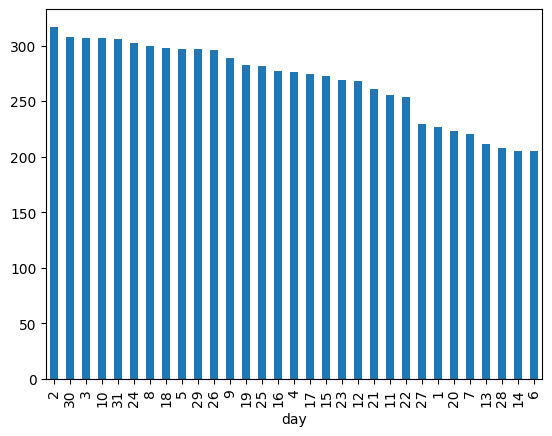

In [18]:
ingr['day'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

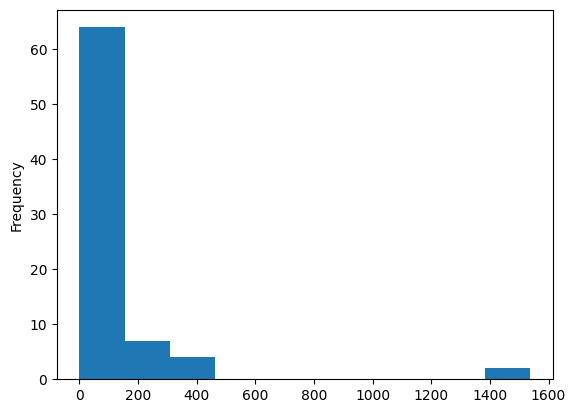

In [19]:
ingr['section'].value_counts().plot(kind='hist')

## Wordclouds

Τα wordclouds είναι ένα γράφημα που μας επιτρέπει να σχηματίσουμε μια γρήγορη άποψη για τη θεματολογία ενός κειμένου ή ενός σώματος κειμένων.

Μπορούμε να φτιάξουμε wordclouds για το σύνολο των κειμένων μας, αλλά μπορεί να είναι χρησιμότερο να το χρησιμοποιήσουμε σε στοχευμένα κείμενα.

Π.χ.: ας υποθέσουμε ότι από τα προηγούμενα γραφήματα είδαμε ότι το πλήθος της αρθρογραφίας μια συγκεκριμένη μέρα (ή σε ένα γκρουπ ημερών) είναι πολύ μεγαλύτερο από το μέσο όρο του πλήθους των άρθρων ανά ημέρα. Και πιο συγκεκριμένα, είναι μεγαλύτερο στην κατηγορία αθλητικά.

Αν φτιάξουμε ένα wordcloud μόνο για τα άρθρα της συγκεκριμένης κατηγορίας, της συγκεκριμένης ημέρας, θα βρούμε γρήγορα τις λέξεις που αφορούν το σημαντικό αθλητικό γεγονός εκείνης της ημέρας.

#### ΠΑΡΑΔΕΙΓΜΑ WORDCLOUD ME KEIMENO ΚΑΤΕΥΘΕΙΑΝ AΠΟ TH ΣΤΗΛΗ ΚΕΙΜΕΝΟΥ ΤΟΥ DATAFRAME

**!!!ΠΡΟΣΟΧΗ!!!** Eπειδή το dataframe φτιάχνεται από αρχείο που είναι στο drive μου, μην κάνετε uncomment και τρέξετε τα παρακάτω κελιά γιατί θα εξαφανιστούν τα outputs.

In [20]:
ingr[ingr["section"]=="Moments"].groupby("day", as_index=False)['title'].count().sort_values("title", ascending=False)

,day,title
27,29,8
9,10,6
16,18,5
5,6,5
20,22,5
29,31,4
28,30,4
25,27,4
7,8,4
24,26,4


In [21]:
ingr[ingr["section"]=="Interviews"].groupby("day", as_index=False)['title'].count().sort_values("title", ascending=False)

,day,title
8,24,3
1,5,2
3,8,2
6,12,2
10,26,2
12,30,2
0,3,1
2,7,1
4,9,1
5,10,1


Βλέπω ότι τα περισσότερα άρθρα στην κατηγορία ΠΟΛΙΤΙΚΗ ήταν στις 6 Ιουνίου (τα δεδομένα μου είναι από 30/5 - 6/6 του 2023). Φιλτράρω το dataframe μου.

In [22]:
ingr[(ingr["section"]=="Interviews")]["text"]

798     Μπορεί η μουσική να αλλάξει τον κόσμο, αφού πρ...
1383    Γνωρίζω την Ηρώ Σαΐα πάνω από 10 χρόνια. Έχουμ...
1430    Η παράσταση που υπογράφει η Τέτη Νικολοπούλου ...
1696    Με το ταλέντο του κυρίως, τον όγκο της δουλειά...
1870    Το τελευταίο βιβλίο του Καθηγητή Γιάγκου Ανδρε...
2018    Ο Μανώλης Χάρος λατρεύει την λογοτεχνία σχεδόν...
2109    Η Ελένη Ζιώγα έχει πολλές ιδιότητες, αλλά ενοπ...
2257    Συναντήσαμε τον Πάνο Παπαδόπουλο μία Τετάρτη α...
2949    «Δύο δεκαετίες μετά την πρώτη τους σύμπραξη» λ...
3199    Λένε ότι όποιος έζησε τα 90s, μέχρι το μεδούλι...
5145    Ο Γιάννης Τσιμιτσέλης αποφάσισε να δώσει μια ν...
6087    Πριν από τρία χρόνια, για τον Τάκη Κανδύλη είχ...
6138    Οι τρεις αποθήκες του Παλαιού Ελαιουργείου μετ...
6337    Συναντήσαμε την Ελένη Γερασιμίδου στις πρόβες ...
6418    Στις 9 Ιουνίου κάνει πρεμιέρα το ντοκιμαντέρ «...
6665    Ένα συμπεριληπτικό καλλιτεχνικό έργο για άτομα...
6742    Ο Γιώργος Κιμούλης αυτό το διάστημα βρίσκεται ...
7293    Ο Thom

Ακριβώς αυτό το φίλτρο μπορώ να το βάλω στην παράμετρο του generate() στο wordcloud

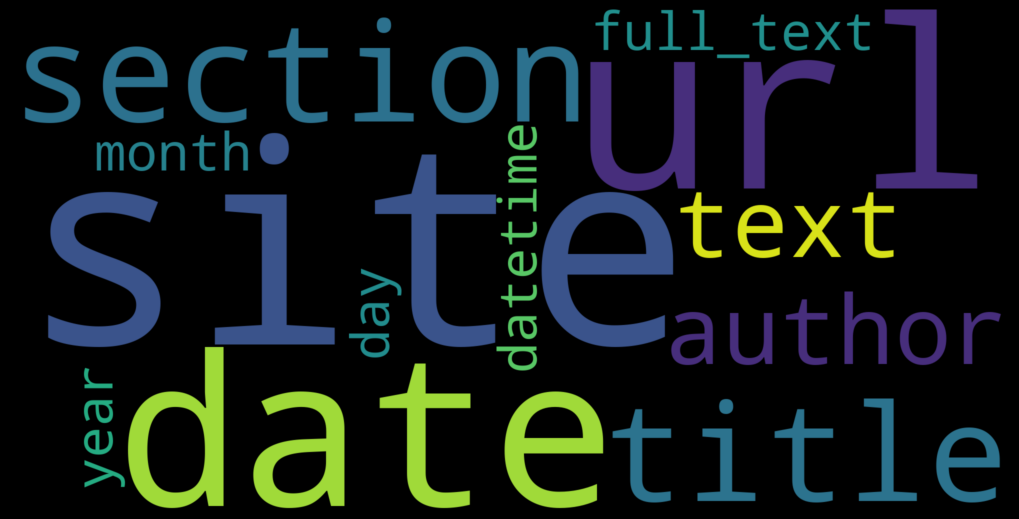

In [23]:
wordcloud = WordCloud(
    stopwords=nlp.Defaults.stop_words,
    width=2000,
    height=1000,
    background_color = 'black'
).generate(' '.join(ingr[(ingr["section"] == "Interviews")]))

fig = plt.figure(
    figsize = (10, 8),
    facecolor = 'k',
    edgecolor = 'k')

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Κι αν θέλω να κάνω και lemmatization για να φύγουν οι διαφορετικές πτώσεις των ίδιων λέξεων:

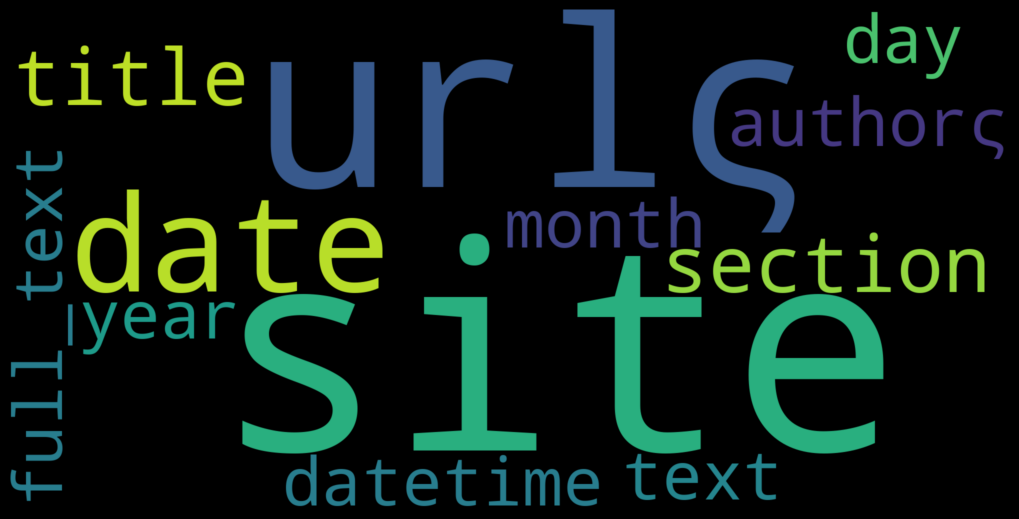

In [29]:
wordcloud = WordCloud(
     stopwords = nlp.Defaults.stop_words,
     width = 2000,
     height = 1000,
     background_color = 'black'
).generate(' '.join(token.lemma_ for token in nlp(' '.join(ingr[(ingr["section"]=="Interviews")]))))
fig = plt.figure(
     figsize = (10, 8),
     facecolor = 'k',
     edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Για όποιον θα ήθελε να παίξει με την εμφάνιση του wordcloud: https://amueller.github.io/word_cloud/auto_examples/index.html

## ΣΥΜΠΕΡΑΣΜΑΤΑ

Τέλος, γράψτε ένα σύντομο κείμενο για τα ευρήματα των αναλύσεών σας.

Δυστυχώς δεν κατάφερα να τελειώσω την άσκηση, καθώς το wordcloud δεν δουλεύει σωστά ή κλατι κάνω εγώ λάθος. Παρόλα αυτά άμα δούλευε θα βλέπαμε ποιες είναι οι συχνόγτερες λέξεις στα άρθρα που περιλαμβάνονται στην κατηγορία Interviews.